In [168]:
import pandas as pd

In [169]:
survey_raw_data = pd.read_csv('survey_results_public.csv')
survey_raw_data

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [170]:
survey_raw_data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [171]:
schema_raw = pd.read_csv('survey_results_schema.csv', index_col='Column').QuestionText

In [172]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

# Data Preperationa and cleaning

In [173]:
selected_columns = [
    #demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    #Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    #Employment
    'Employment',
    "DevType",
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [174]:
len(selected_columns)

20

In [175]:
survey_df = survey_raw_data[selected_columns].copy()

In [176]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
schema = schema_raw[selected_columns].copy()

In [178]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [179]:
survey_df.shape

(64461, 20)

In [180]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [181]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [182]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [183]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [184]:
survey_df.drop(survey_df[survey_df.Age < 10].index,inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index,inplace=True)

In [185]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [186]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [187]:
survey_df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [188]:
import numpy as np

In [189]:
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)), np.nan, inplace=True)

In [190]:
survey_df['Gender'].value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [191]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
14126,United States,NaN,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,18.0,14.0,R,Python;R,Once every few years,Call a coworker or friend;Visit Stack Overflow,Employed full-time,Scientist,40.0,Very satisfied,Specific department or team I’d be working on;...,Sometimes: 1-2 days per month but less than we...,Critically important
50471,Lebanon,13.0,Man,Primary/elementary school,NaN,Yes,8.0,5.0,NaN,C;C++;HTML/CSS;JavaScript;PHP;SQL,C;C++;HTML/CSS;JavaScript;PHP;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,Student,NaN,NaN,NaN,NaN,NaN,NaN
2376,Belgium,52.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,11.0,41.0,8.0,Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;...,C#;C++;Swift,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Product manager,NaN,NaN,NaN,NaN,Very important
48769,United States,61.0,Man,Some college/university study without earning ...,NaN,Yes,15.0,46.0,43.0,C;HTML/CSS;JavaScript;PHP;SQL,C;PHP;SQL;Swift,Once a year,Call a coworker or friend;Visit Stack Overflow,"Independent contractor, freelancer, or self-em...","Developer, back-end;System administrator",40.0,Slightly dissatisfied,NaN,Often: 1-2 days per week or more,Somewhat important
6686,Slovenia,28.0,Man,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,12.0,8.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Java,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end",50.0,Very satisfied,"Languages, frameworks, and other technologies ...",NaN,Fairly important
3968,Netherlands,45.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,11.0,34.0,25.0,Bash/Shell/PowerShell;HTML/CSS;Python;SQL,C++;Go,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Very satisfied,How widely used or impactful my work output wo...,Rarely: 1-2 days per year or less,Very important
47025,United States,32.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fine arts or performing arts (such as graphic ...,No,14.0,16.0,10.0,HTML/CSS;Java;JavaScript;PHP;SQL,HTML/CSS;JavaScript;PHP;Swift,Once every few years,Meditate;Play games;Visit Stack Overflow;Go fo...,Employed full-time,"Designer;Developer, front-end;Developer, mobile",40.0,Very satisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Fairly important
6079,India,19.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,15.0,4.0,NaN,C;Python,C#;C++;Java;JavaScript,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,Student,NaN,NaN,NaN,Industry that I’d be working in,NaN,NaN
16423,Nigeria,33.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,14.0,9.0,C++;HTML/CSS;Java;JavaScript;PHP;Python;SQL,C++;HTML/CSS;Java;JavaScript;PHP;Python;SQL,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,Academic researcher;Data scientist or machine ...,45.0,Slightly satisfied,Financial performance or funding status of the...,Sometimes: 1-2 days per month but less than we...,Critically important
13431,Germany,17.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,11.0,2.0,1.0,Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScri...,Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScri...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, back-end;Developer, deskto...",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Of

# Exploratory Analysis and visualization 

In [192]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Country 

In [193]:
schema.Country

'Where do you live?'

In [194]:
# Use shit+tab to see inside the function just put the cursor inside () these brackets and use shift+tab

In [195]:
survey_df.Country.nunique()

183

In [196]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

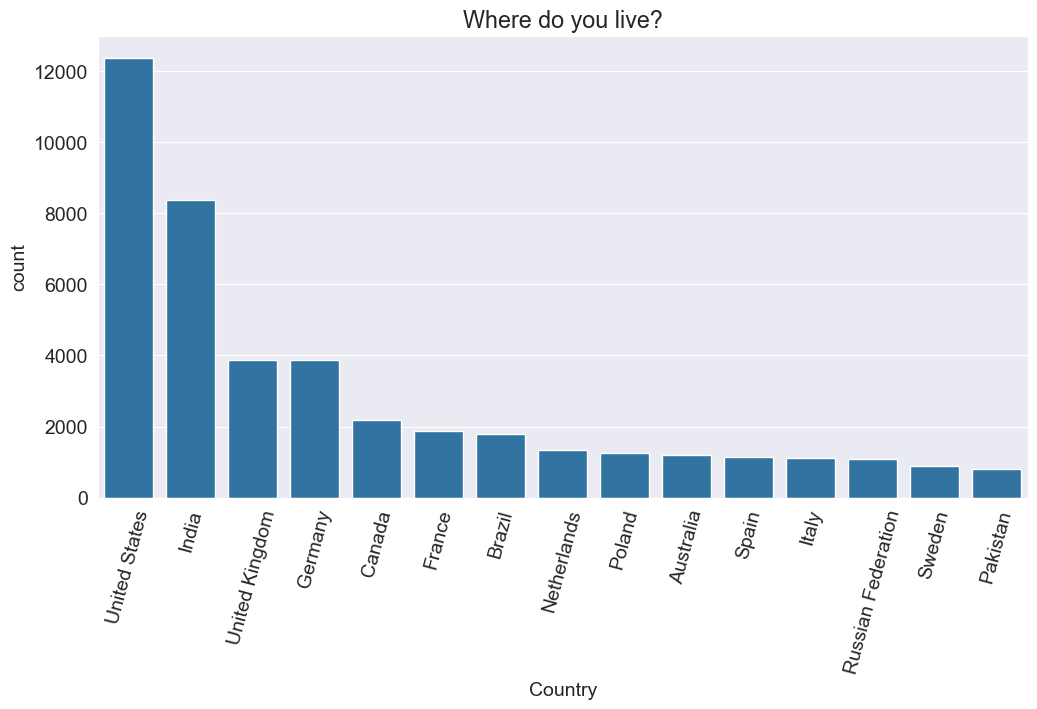

In [197]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

In [198]:
# The above data visualization is a bit biased because stack overflow generally used the english language
# so non english spoken countries either not participated in the survey or they are not understand the survey requirements

In [199]:
language_data = pd.read_csv('countries-languages.csv')

In [200]:
language_data

,Country,Languages Spoken
0,Afghanistan,"Dari Persian, Pashtu (both official), other Tu..."
1,Albania,"Albanian (Tosk is the official dialect), Greek"
2,Algeria,"Arabic (official), French, Berber dialects"
3,Andorra,"Catalán (official), French, Castilian, Portuguese"
4,Angola,"Portuguese (official), Bantu and other African..."
...,...,...
193,Vietnam,Vietnamese (official); English (increasingly f...
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic"
195,Yemen,Arabic
196,Zambia,"English (official); major vernaculars: Bemba, ..."


In [201]:
english_word = language_data['Languages Spoken'].str.contains('English', na=False)

In [202]:
language_data[english_word]

,Country,Languages Spoken
5,Antigua and Barbuda,"English (official), local dialects"
6,Argentina,"Spanish (official), English, Italian, German, ..."
8,Australia,"English 79%, native and other languages"
11,Bahamas,"English (official), Creole (among Haitian immi..."
12,Bahrain,"Arabic, English, Farsi, Urdu"
...,...,...
187,United States,"English 82%, Spanish 11% (2000)"
190,Vanuatu,"Bislama 23% (a Melanesian pidgin English), Eng..."
193,Vietnam,Vietnamese (official); English (increasingly f...
196,Zambia,"English (official); major vernaculars: Bemba, ..."


In [203]:
english_speaking_countries = language_data[language_data['Languages Spoken'].str.contains('English')]['Country']

In [204]:
english_speaking_countries

5      Antigua and Barbuda
6                Argentina
8                Australia
11                 Bahamas
12                 Bahrain
              ...         
187          United States
190                Vanuatu
193                Vietnam
196                 Zambia
197               Zimbabwe
Name: Country, Length: 96, dtype: object

In [205]:
english_stackoverflow = survey_df[survey_df['Country'].isin(english_speaking_countries)]
non_english_stackoverflow = survey_df[~survey_df['Country'].isin(english_speaking_countries)]

In [206]:
english_stackoverflow

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
6,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,6.0,4.0,C#;HTML/CSS;PHP,C#;HTML/CSS;PHP,Every few months,NaN,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Very satisfied,NaN,Sometimes: 1-2 days per month but less than we...,Very important
7,United States,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,17.0,13.0,Python;SQL,JavaScript,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",39.0,Slightly dissatisfied,Remote work options;Opportunities for professi...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
9,United Kingdom,22.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,14.0,8.0,4.0,HTML/CSS;Java;JavaScript;Python;SQL,HTML/CSS;Java;JavaScript;Python;R;SQL,Every few months,Visit Stack Overflow,Employed full-time,"Database administrator;Developer, full-stack;D...",36.0,Very satisfied,Flex time or a flexible schedule;How widely us...,Often: 1-2 days per week or more,Fairly important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64447,Bangladesh,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",Yes,16.0,6.0,3.0,C#;HTML/CSS;Java;JavaScript;Swift,PHP;Python,Once a year,Call a coworker or friend;Watch help / tutoria...,"Independent contractor, freelancer, or self-em...","Developer, back-end",NaN,NaN,NaN,NaN,Somewhat important
64448,Nepal,NaN,NaN,"Secondary school (e.g. American high school, G...",NaN,Yes,17.0,3.0,NaN,NaN,NaN,NaN,NaN,"Not employed, but looking for work","Developer, back-end;Developer, desktop or ente...",NaN,NaN,NaN,NaN,Not at all important/not necessary
64452,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64453,Thailand,NaN,NaN,Primary/elementary school,NaN,Yes,5.0,3.0,NaN,C++;HTML/CSS,C++;HTML/CSS,Once a year,Watch help / tutorial videos,"Not employed, but looking for work","Data or business analyst;Developer, mobile;Sen...",NaN,NaN,NaN,NaN,Very important


In [207]:
non_english_stackoverflow

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
5,Germany,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,No,14.0,6.0,4.0,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,Once a year,Play games;Visit Stack Overflow;Watch help / t...,Employed full-time,"Designer;Developer, front-end;Developer, mobile",NaN,Slightly satisfied,Diversity of the company or organization;Langu...,Never,Fairly important
8,Tunisia,30.0,Man,"Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...",No,20.0,6.0,4.0,HTML/CSS;JavaScript;PHP,Python;Rust,Once a year,Meditate,"Independent contractor, freelancer, or self-em...","Developer, full-stack",50.0,Very dissatisfied,Diversity of the company or organization;Remot...,Occasionally: 1-2 days per quarter but less th...,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64455,Netherlands,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Java,NaN,NaN,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
survey_df.shape

(64306, 20)

In [209]:
english_stackoverflow.shape

(38645, 20)

In [210]:
non_english_stackoverflow.shape

(25661, 20)

In [211]:
top_english_countries = english_stackoverflow.Country.value_counts().head(15)

In [212]:
top_english_countries

Country
United States     12371
India              8364
United Kingdom     3881
Canada             2175
Brazil             1804
Australia          1199
Pakistan            802
Israel              649
Bangladesh          595
Nigeria             588
Indonesia           494
South Africa        493
Ireland             444
Philippines         404
Argentina           392
Name: count, dtype: int64

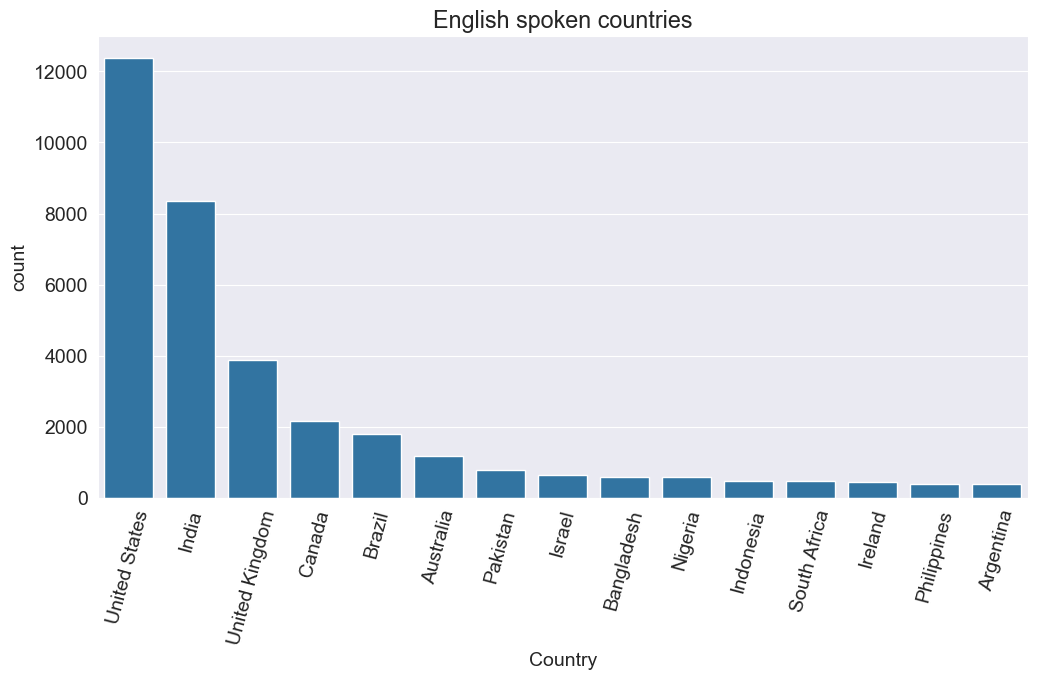

In [213]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("English spoken countries")
sns.barplot(x=top_english_countries.index, y=top_english_countries);

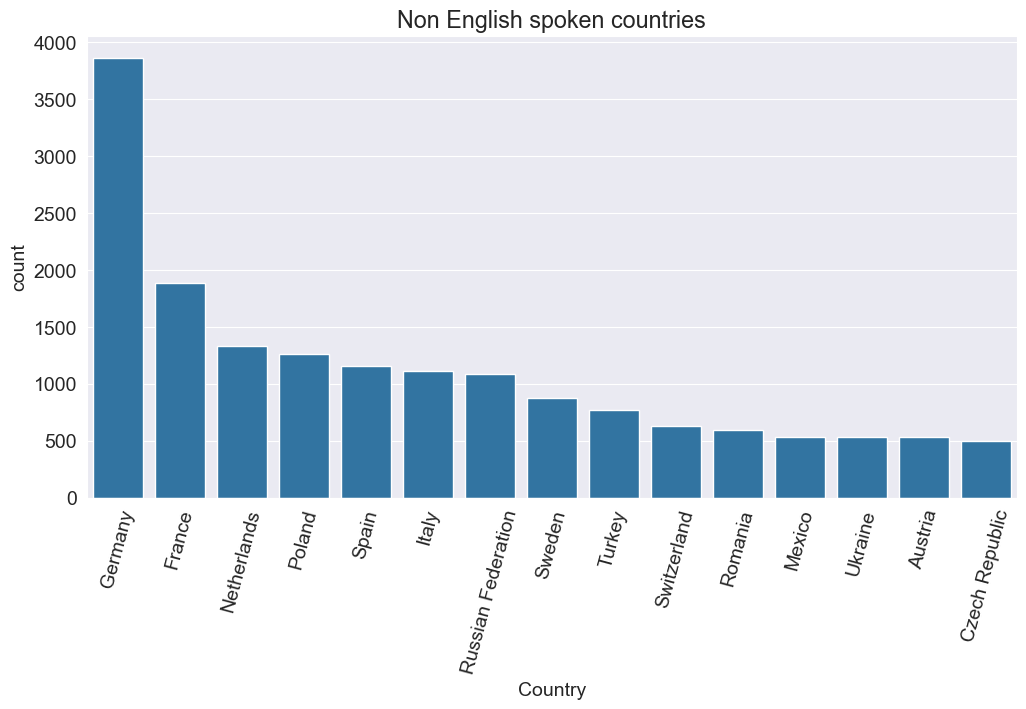

In [214]:
top_non_english_countries = non_english_stackoverflow.Country.value_counts().head(15)
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Non English spoken countries")
sns.barplot(x=top_non_english_countries.index, y=top_non_english_countries);

# Age

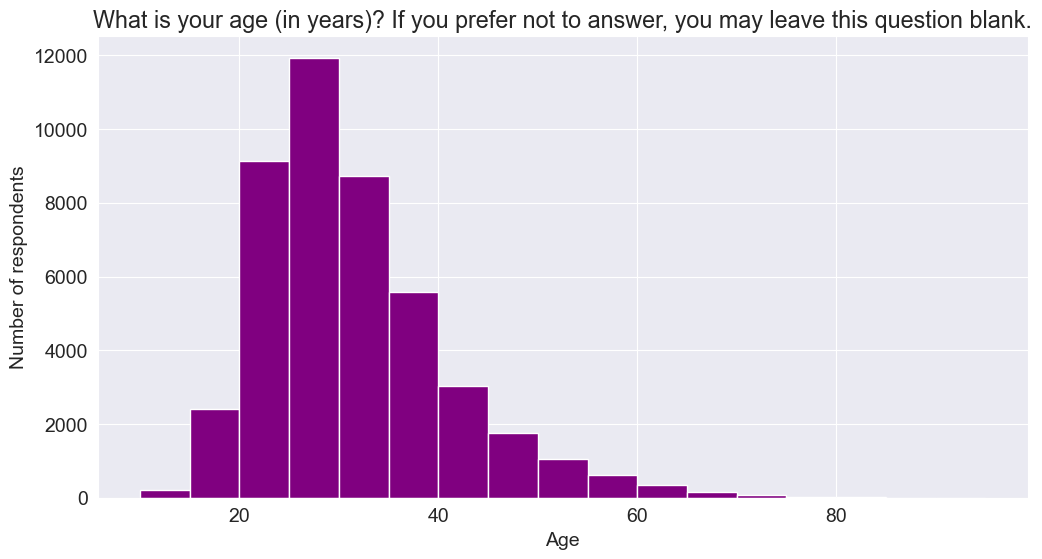

In [215]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel("Number of respondents")

plt.hist(survey_df.Age, bins=np.arange(10,100,5), color='purple');

In [216]:
survey_df.Age

0         NaN
1         NaN
2         NaN
3        25.0
4        31.0
         ... 
64456     NaN
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: Age, Length: 64306, dtype: float64

#  Gender

In [217]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [218]:
gender_counts = survey_df.Gender.value_counts()

In [219]:
gender_counts

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

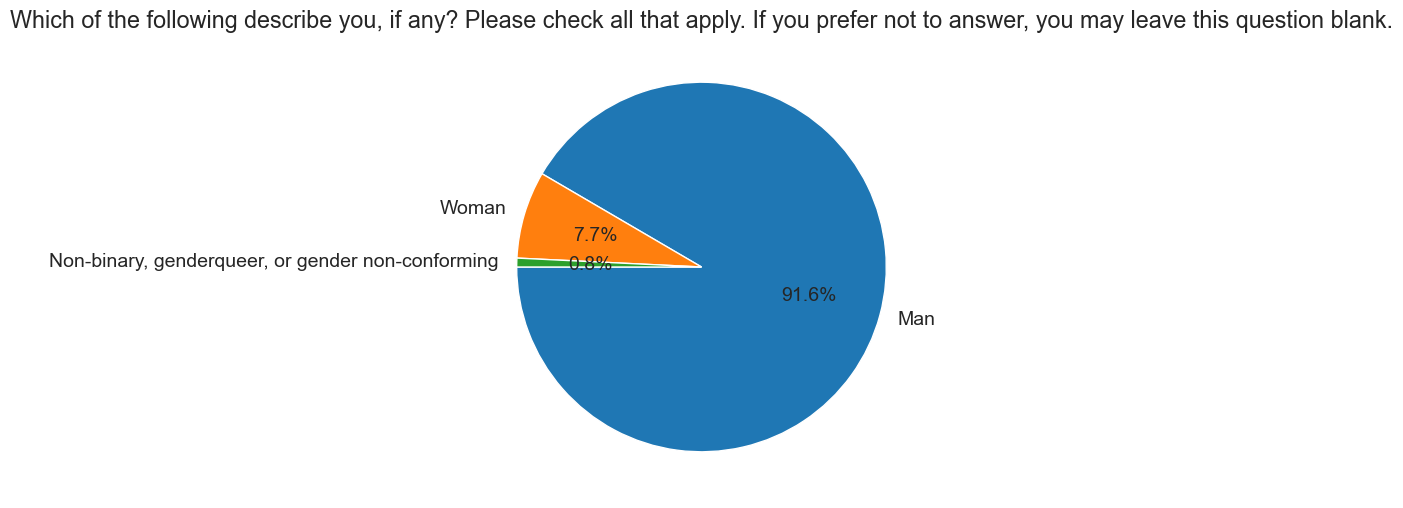

In [220]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels = gender_counts.index, autopct="%1.1f%%", startangle=180);

# Education Level

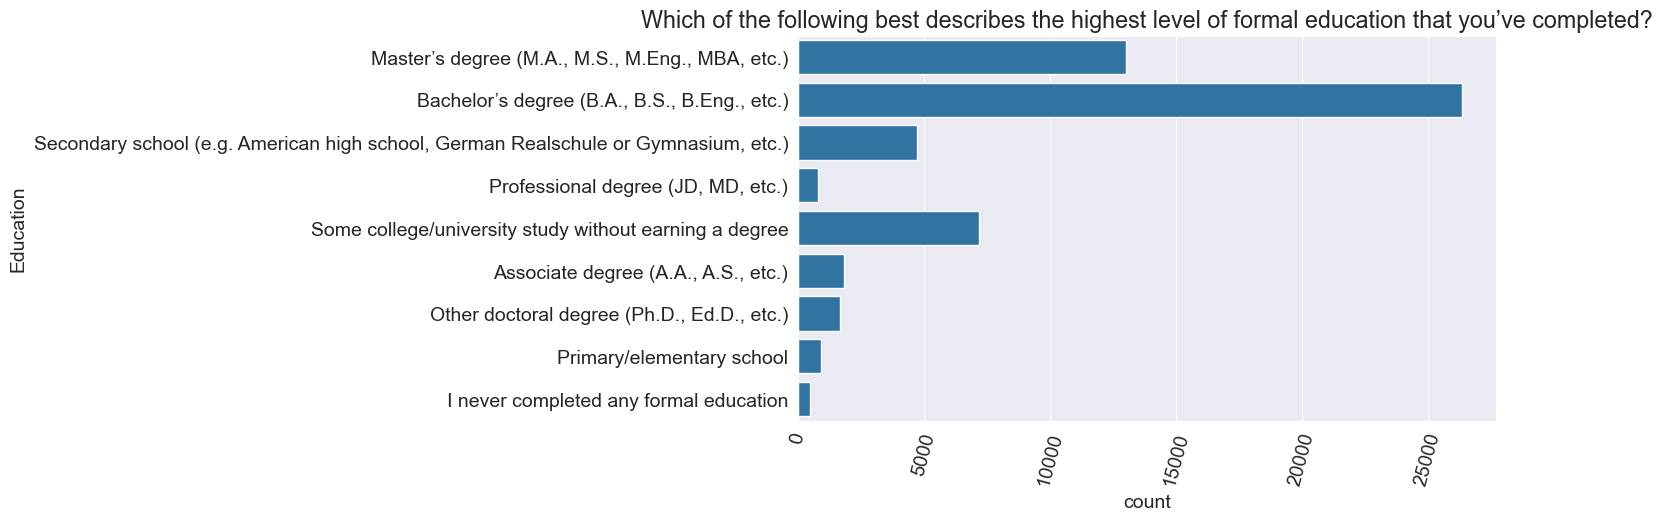

In [221]:
sns.countplot(y=survey_df.EdLevel) # without y it is going to be verticle bars
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel('Education');

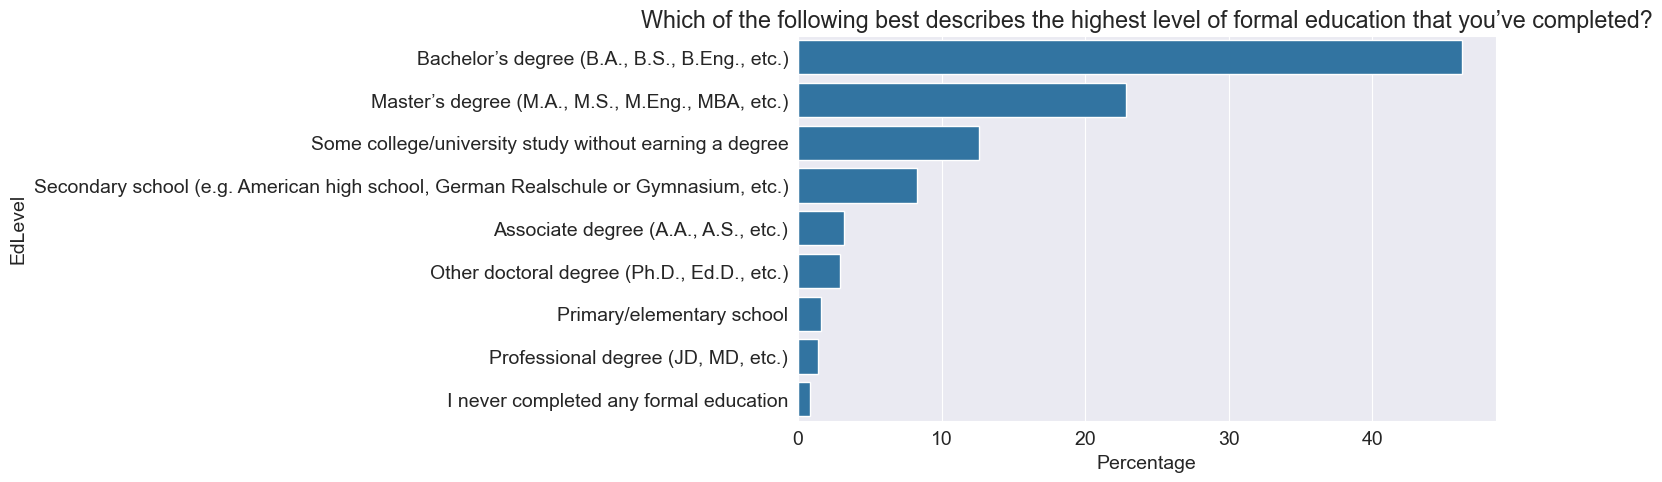

In [222]:
# Exercise: Try to make the no of count in percentage instead of no of records

EdLevel_percentage = survey_df.EdLevel.value_counts() * 100 / survey_df.EdLevel.count()
sns.barplot(x=EdLevel_percentage, y=EdLevel_percentage.index)
plt.title(schema['EdLevel'])
plt.xlabel('Percentage');

In [223]:
schema.UndergradMajor

'What was your primary field of study?'

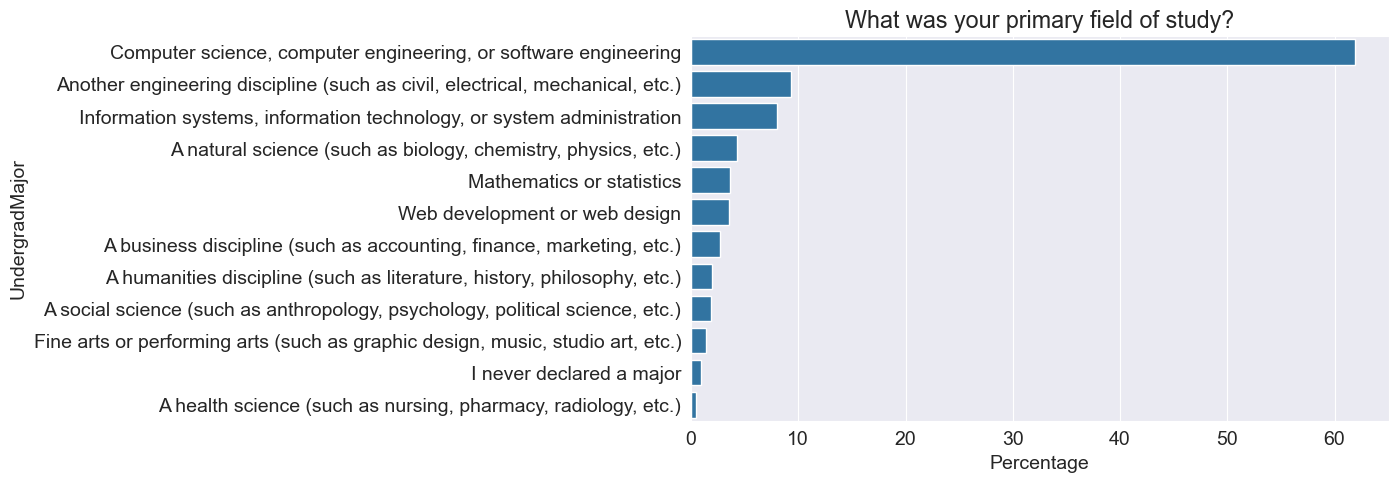

In [224]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()
sns.barplot(x=undergrad_pct, y=undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.xlabel('Percentage');

In [225]:
# Exercise: Analysis the results of the NEWEdImpt column for respondents who hold some college degrees vs those who don't. Do you notice any difference in opinions?

In [226]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

# Employment

In [227]:
schema.Employment

'Which of the following best describes your current employment status?'

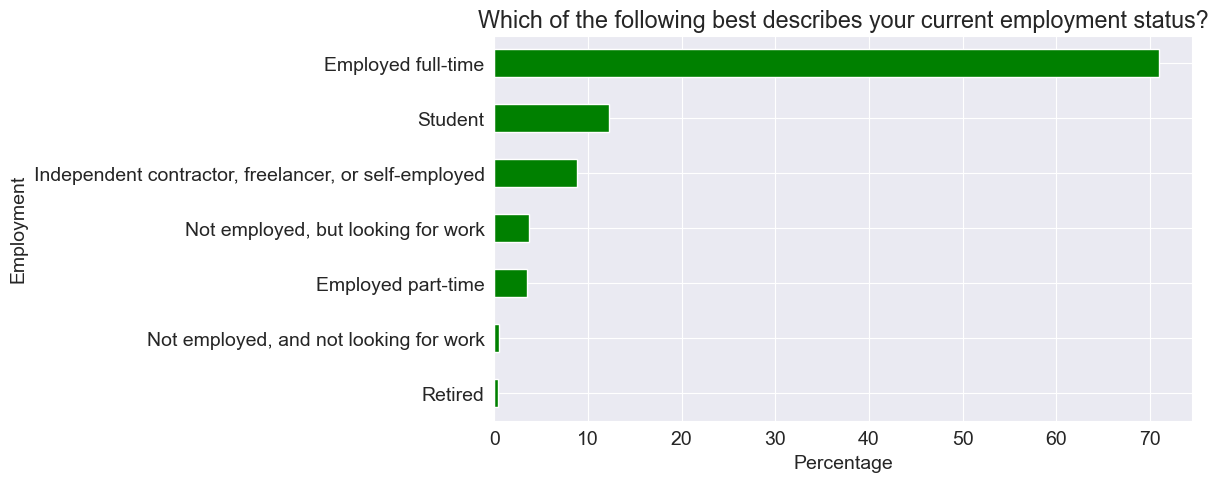

In [228]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)* 100).plot(kind='barh',color='g')
plt.title(schema.Employment)
plt.xlabel("Percentage");

In [229]:
# Exercise: Adda new column EmploymentType which contains values Enthusiast (student or not employed but looking for work), Professional (employed full-time, part-time or freelancing)
# and other(not employed or retired). For each pf the angle that follow, show a comparison between Enthusiast and Professional.

In [230]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [231]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                       

In [232]:
survey_df.DevType.unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Senior executive/VP;System administrator',
       'Data or business analyst;Developer, mobile;Senior executive/VP;System administrator'],
      dtype=object)

In [235]:
# def split_multicolumn(col_series):
#     result_df = col_series.to_frame()
#     options = []
#     # iterate over the column
#     for idx, value in col_series[col_series.notnull()].iteritems():
#         # Break each value into list of options
#         for option in value.split(';'):
#             # add the option as a column to result
#             if not option in result_df.columns:
#                 options.append(option)
#                 result_df[option] = False
#             # Mark the value in the option column as True
#             result_df.at[idx, option] = True
#     return result_df[options]

def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # iterate over the column
    for idx, value in col_series[col_series.notnull()].items():
        # Break each value into a list of options
        for option in value.split(';'):
            # Add the option as a column to the result
            if option not in result_df.columns:
                options.append(option)
                result_df.loc[:, option] = False  # Explicit column alignment
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    
    # Return only the newly added option columns
    return result_df[options]

In [237]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [239]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [244]:
dev_type_total = dev_type_df.sum().sort_values(ascending=False)
dev_type_total

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

In [245]:
# Exercise: 
# 1. Can you figure out what percentage of respondents work in roles related to data science?
# 2. Which role has the highest percentage of women?